In [1]:
!pip install npTDMS

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from nptdms import TdmsFile
from nptdms import TdmsWriter, ChannelObject
import numpy
import pandas as pd
from nptdms import TdmsFile
import numpy as np
import pandas as pd
import os
import csv
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame

In [90]:
# 2,3,4當train、8當test
# preprocessing
# mean
path = "/Users/USER/Desktop/大數據分析大賽/split9/test"
os.chdir( path )

files = os.listdir(path)
with open("/Users/USER/Desktop/大數據分析大賽/split9/test/original_mean.csv",'w') as writeFile:
    writer = csv.writer(writeFile)
    for file in files:
        tdms_file = TdmsFile(file)
        tdms_groups = tdms_file.groups()
        for group in tdms_file.groups():
            grp1_data = tdms_file.object('Spindle').as_dataframe()
            grp2_data = tdms_file.object('Current').as_dataframe()
            cnc = pd.concat([grp1_data,grp2_data],axis=1)
            mean = cnc.mean() 
        writer.writerows([mean])
cnc_mean = pd.read_csv("original_mean.csv",names=['S01','S02','S03','IA','IB','IC'])
cnc_mean.to_csv("mean.csv")

C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\nptdms\tdms.py:772: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  for ch in self.tdms_file.group_channels(self.group)])


In [9]:
# 2,3,4當train、8當test
# preprocessing
# std
path = "/Users/USER/Desktop/大數據分析大賽/split9/8"
os.chdir( path )

files = os.listdir(path)
with open("/Users/USER/Desktop/大數據分析大賽/split9/8/original_std.csv",'w') as writeFile:
    writer = csv.writer(writeFile)
    for file in files:
        tdms_file = TdmsFile(file)
        tdms_groups = tdms_file.groups()
        for group in tdms_file.groups():
            grp1_data = tdms_file.object('Spindle').as_dataframe()
            grp2_data = tdms_file.object('Current').as_dataframe()
            cnc = pd.concat([grp1_data,grp2_data],axis=1)
            std = cnc.std() 
        writer.writerows([std])
cnc_mean = pd.read_csv("original_std.csv",names=['S01','S02','S03','IA','IB','IC'])
cnc_mean.to_csv("std.csv")

In [5]:
# 預處理

In [6]:
cnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536000 entries, 0 to 1535999
Data columns (total 6 columns):
S01    1536000 non-null float64
S02    1536000 non-null float64
S03    1536000 non-null float64
IA     1536000 non-null float64
IB     1536000 non-null float64
IC     1536000 non-null float64
dtypes: float64(6)
memory usage: 70.3 MB


In [7]:
cnc.isnull().sum()

S01    0
S02    0
S03    0
IA     0
IB     0
IC     0
dtype: int64

In [134]:
# 補NA值，時序資料常用往前遇到的第一個非 nan 值
cnc['S01'].fillna(method='ffill', inplace=True)
cnc['IC'].fillna(method='ffill', inplace=True)

In [135]:
cnc = cnc.fillna(method='ffill')

In [ ]:
file = "/Users/USER/Desktop/大數據分析大賽/split9/cu/number12.tdms"
tdms_file = TdmsFile(file)
tdms_groups = tdms_file.groups()
for group in tdms_file.groups():
    grp1_data = tdms_file.object('Spindle').as_dataframe()
    grp2_data = tdms_file.object('Current').as_dataframe()
    cnc = pd.concat([grp1_data,grp2_data],axis=1)
print(cnc)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
 
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from sklearn.ensemble import AdaBoostRegressor
from tsfresh.utilities.dataframe_functions import impute
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 2,3,4當train、82當test
# preprocessing
# mean
path = "/Users/USER/Desktop/大數據分析大賽/split9/2"
os.chdir( path )

files = os.listdir(path)
with open("/Users/USER/Desktop/大數據分析大賽/split9/2/original_mean.csv",'w') as writeFile:
    writer = csv.writer(writeFile)
    for file in files:
        tdms_file = TdmsFile(file)
        tdms_groups = tdms_file.groups()
        for group in tdms_file.groups():
            grp1_data = tdms_file.object('Spindle').as_dataframe()
            grp2_data = tdms_file.object('Current').as_dataframe()
            cnc = pd.concat([grp1_data,grp2_data],axis=1)
            mean = cnc.mean() 
        writer.writerows([mean])
cnc_mean = pd.read_csv("original_mean.csv",names=['S01','S02','S03','IA','IB','IC'])
cnc_mean.to_csv("mean.csv")

In [32]:
# 2,3,4當train、82當test
# preprocessing
# mean
path = "/Users/USER/Desktop/大數據分析大賽/split9/2"
os.chdir( path )

files = os.listdir(path)
with open("/Users/USER/Desktop/大數據分析大賽/split9/2/original_all.csv",'w') as writeFile:
    writer = csv.writer(writeFile)
    for file in files:
        tdms_file = TdmsFile(file)
        tdms_groups = tdms_file.groups()
        for group in tdms_file.groups():
            grp1_data = tdms_file.object('Spindle').as_dataframe()
            grp2_data = tdms_file.object('Current').as_dataframe()
            cnc = pd.concat([grp1_data,grp2_data],axis=1) 
print(cnc)
cnc.to_csv("all.csv")

              S01       S02       S03         IA         IB         IC
0       -0.055719 -0.832051  1.298758 -13.666917 -33.478444  45.538024
1        1.280510 -1.489695 -2.848784 -15.785851 -37.067411  51.070035
2       -0.975207  0.862919 -2.780742 -15.398786 -40.016515  54.171096
3        1.043348  3.145402 -0.918428 -10.931933 -39.190672  48.484063
4        2.313699  2.277975 -4.078803  -8.255120 -38.051521  44.739422
5        1.015899  1.449334 -1.254487  -3.774532 -37.446199  39.522310
6        0.425558  1.968912  1.938138  -1.613262 -39.198970  39.491832
7        0.954657  0.536536  1.019625  -4.702228 -43.246203  46.363564
8       -0.181497 -0.736429 -1.030081  -4.586168 -45.600288  48.739133
9       -1.303988 -1.288450  1.229738   0.061878 -45.886196  44.576601
10       0.366145 -2.724729  2.139334   0.992083 -45.265341  42.530809
11       0.153871 -2.225153  0.003384   3.099916 -44.916052  40.180205
12      -0.130991 -1.797417  2.371070   7.722373 -46.198032  36.952783
13    

In [3]:
# 2 concate
appended_data_2 = []
path = "/Users/USER/Desktop/大數據分析大賽/split9/2"
os.chdir( path )

files = os.listdir(path)
with open("/Users/USER/Desktop/大數據分析大賽/split9/2/original_all.csv",'w') as writeFile:
    writer = csv.writer(writeFile)
    for file in files:
        tdms_file = TdmsFile(file)
        tdms_groups = tdms_file.groups()
        for group in tdms_file.groups():
            grp1_data = tdms_file.object('Spindle').as_dataframe()
            grp2_data = tdms_file.object('Current').as_dataframe()
            cnc = pd.concat([grp1_data,grp2_data],axis=1)
        appended_data_2.append(cnc)
appended_data_2 = pd.concat(appended_data_2, axis=0)
appended_data_2["id"]=2
appended_data_2["time"]=appended_data_2.index

C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\nptdms\tdms.py:772: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  for ch in self.tdms_file.group_channels(self.group)])


In [3]:
# 3 concate
appended_data_3 = []
path = "/Users/USER/Desktop/大數據分析大賽/split9/3"
os.chdir( path )

files = os.listdir(path)
with open("/Users/USER/Desktop/大數據分析大賽/split9/3/original_all.csv",'w') as writeFile:
    writer = csv.writer(writeFile)
    for file in files:
        tdms_file = TdmsFile(file)
        tdms_groups = tdms_file.groups()
        for group in tdms_file.groups():
            grp1_data = tdms_file.object('Spindle').as_dataframe()
            grp2_data = tdms_file.object('Current').as_dataframe()
            cnc = pd.concat([grp1_data,grp2_data],axis=1)
        appended_data_3.append(cnc)
appended_data_3 = pd.concat(appended_data_3, axis=0)
appended_data_3["id"]=3
appended_data_3["time"]=appended_data_3.index

C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\nptdms\tdms.py:772: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  for ch in self.tdms_file.group_channels(self.group)])


In [4]:
# 測試tsfresh 
path = "/Users/USER/Desktop/大數據分析大賽/split9"
os.chdir( path )

con_23 = pd.concat([appended_data_2,appended_data_3])

In [30]:
y2 = pd.read_csv("y2.csv")
y3 = pd.read_csv("y3.csv")
y = pd.concat([y2,y3])
# y = y.values

In [27]:
df = pd.DataFrame([list(range(5))], columns=["a{}".format(i) for i in range(5)])

,m1,s1,m2,s2,m3,s3
0,0.026,0.183,0.018,3188.000,0.021,0.179
0,0.030,0.248,0.022,0.203,0.025,0.202


In [5]:
extract_settings = ComprehensiveFCParameters()

In [6]:
X_filtered = extract_features(con_23, column_id='id', column_sort='time', default_fc_parameters=extract_settings)

MemoryError: 

C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\USER\

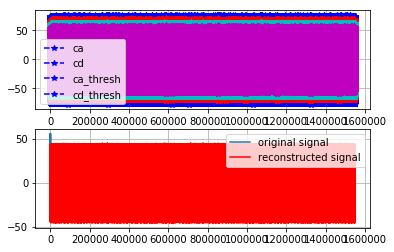

In [15]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

ts = [2, 56, 3, 22, 3, 4, 56, 7, 8, 9, 44, 23, 1, 4, 6, 2]

(ca, cd) = pywt.dwt(cnc,'db4',mode='sym')

cat = pywt.threshold(ca, np.std(ca)/2)
cdt = pywt.threshold(cd, np.std(cd)/2)


ts_rec = pywt.idwt(cat, cdt, 'haar')

plt.close('all')

plt.subplot(211)
# Original coefficients
plt.plot(ca, '--*b')
plt.plot(cd, '--*r')
# Thresholded coefficients
plt.plot(cat, '--*c')
plt.plot(cdt, '--*m')
plt.legend(['ca','cd','ca_thresh', 'cd_thresh'], loc=0)
plt.grid('on')

plt.subplot(212)
plt.plot(ts)
plt.hold('on')
plt.plot(ts_rec, 'r')
plt.legend(['original signal', 'reconstructed signal'])
plt.grid('on')
plt.show()

In [11]:
ca.shape

(1548800, 6)

In [12]:
ca

array([[-21.93865013,  -2.5712066 ,  -2.49126113,  10.11249015,
        -41.87866552,  57.07540089],
       [-24.23536713,  -6.86063854,  -0.29242181,   8.45472366,
        -47.93898798,  64.02620677],
       [-25.99551696,  -4.68289399,  -2.98247433,  10.42936079,
        -50.2528867 ,  67.633478  ],
       ...,
       [-16.10237396,   5.39345213,   0.92455235,  11.60935289,
        -21.06218176,  16.2933356 ],
       [-13.84806507,   6.7832659 ,   1.01178342,  11.73657132,
        -16.77591451,  11.91994453],
       [-11.75675477,   6.58508324,   0.9681284 ,  10.54886357,
        -13.54795533,   8.62019707]])

In [7]:
# 2,3,4當train、8當test
# preprocessing
# rms
path = "/Users/USER/Desktop/大數據分析大賽/split9/8"
os.chdir( path )

files = os.listdir(path)
with open("/Users/USER/Desktop/大數據分析大賽/split9/8/original_rms.csv",'w') as writeFile:
    writer = csv.writer(writeFile)
    for file in files:
        tdms_file = TdmsFile(file)
        tdms_groups = tdms_file.groups()
        for group in tdms_file.groups():
            grp1_data = tdms_file.object('Spindle').as_dataframe()
            grp2_data = tdms_file.object('Current').as_dataframe()
            cnc = pd.concat([grp1_data,grp2_data],axis=1)
            rms = np.sqrt(np.mean(cnc**2))
        writer.writerows([rms])
cnc_mean = pd.read_csv("original_rms.csv",names=['S01','S02','S03','IA','IB','IC'])
cnc_mean.to_csv("rms.csv")

In [12]:
# 2,3,4當train、8當test
# preprocessing
# max
path = "/Users/USER/Desktop/大數據分析大賽/split9/8"
os.chdir( path )

files = os.listdir(path)
with open("/Users/USER/Desktop/大數據分析大賽/split9/8/original_max.csv",'w') as writeFile:
    writer = csv.writer(writeFile)
    for file in files:
        tdms_file = TdmsFile(file)
        tdms_groups = tdms_file.groups()
        for group in tdms_file.groups():
            grp1_data = tdms_file.object('Spindle').as_dataframe()
            grp2_data = tdms_file.object('Current').as_dataframe()
            cnc = pd.concat([grp1_data,grp2_data],axis=1)
            maxx = cnc.max()
        writer.writerows([maxx])
cnc_mean = pd.read_csv("original_max.csv",names=['S01','S02','S03','IA','IB','IC'])
cnc_mean.to_csv("max.csv")

In [17]:
# skewness偏態係數
# 2,3,4當train、8當test
# preprocessing
path = "/Users/USER/Desktop/大數據分析大賽/split9/8"
os.chdir( path )

files = os.listdir(path)
with open("/Users/USER/Desktop/大數據分析大賽/split9/8/original_skew.csv",'w') as writeFile:
    writer = csv.writer(writeFile)
    for file in files:
        tdms_file = TdmsFile(file)
        tdms_groups = tdms_file.groups()
        for group in tdms_file.groups():
            grp1_data = tdms_file.object('Spindle').as_dataframe()
            grp2_data = tdms_file.object('Current').as_dataframe()
            cnc = pd.concat([grp1_data,grp2_data],axis=1)
            skew = cnc.skew()
        writer.writerows([skew])
cnc_mean = pd.read_csv("original_skew.csv",names=['S01','S02','S03','IA','IB','IC'])
cnc_mean.to_csv("skew.csv")

In [21]:
# kurtosis峰態係數
# 2,3,4當train、8當test
# preprocessing
path = "/Users/USER/Desktop/大數據分析大賽/split9/8"
os.chdir( path )

files = os.listdir(path)
with open("/Users/USER/Desktop/大數據分析大賽/split9/8/original_kurtosis.csv",'w') as writeFile:
    writer = csv.writer(writeFile)
    for file in files:
        tdms_file = TdmsFile(file)
        tdms_groups = tdms_file.groups()
        for group in tdms_file.groups():
            grp1_data = tdms_file.object('Spindle').as_dataframe()
            grp2_data = tdms_file.object('Current').as_dataframe()
            cnc = pd.concat([grp1_data,grp2_data],axis=1)
            kurtosis = cnc.kurtosis()
        writer.writerows([kurtosis])
cnc_mean = pd.read_csv("original_kurtosis.csv",names=['S01','S02','S03','IA','IB','IC'])
cnc_mean.to_csv("kurtosis.csv")